# Assignment 3

## Hyperparameter Tunning

### Zifeng Xu, Wendi Chu, Kefan Yu

### Net ID: zx111, wc777, ky285

### Contribution:
Zifeng Xu: Data Preparation and RandomSearch\
Wendi Chu: GridSearch and Comparison\
Kefan Yu: Classification Routine and Comparison


### GitHub repo link:
https://github.com/WilliamChuFCB/DSAN6700-Assignment3-Group06

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_palette

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
import random
random.seed(8649)

## 6. Data Preparation (7 Points)

### 6.1 Load the dataset and display the dataframe (2 Points).

In [63]:
# load the dataset.
df=pd.read_csv("online_shoppers_intention.csv")

In [64]:
# change the data type of the column
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

# convert the categorical values of the column VisitorType into a numerical representation
df.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(df['VisitorType'])[0] + 1)

df = df.drop('VisitorType', axis=1)

# Define a prefix
prefix = 'g06_'

# Add the prefix to all column names
df.columns = [prefix + col for col in df.columns]

# display the dataframe
df.head()

,g06_Administrative,g06_Administrative_Duration,g06_Informational,g06_Informational_Duration,g06_ProductRelated,g06_ProductRelated_Duration,g06_BounceRates,g06_ExitRates,g06_PageValues,g06_SpecialDay,g06_Month,g06_OperatingSystems,g06_Browser,g06_Region,g06_TrafficType,g06_VisitorTypeNumeric,g06_Weekend,g06_Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,1,0


In [65]:
month = {
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['g06_Month'] = df['g06_Month'].replace(month)

### 6.2 Use describe to provide statistics on the pandas Dataframe (2 Points).

In [66]:
df.describe()

,g06_Administrative,g06_Administrative_Duration,g06_Informational,g06_Informational_Duration,g06_ProductRelated,g06_ProductRelated_Duration,g06_BounceRates,g06_ExitRates,g06_PageValues,g06_SpecialDay,g06_Month,g06_OperatingSystems,g06_Browser,g06_Region,g06_TrafficType,g06_VisitorTypeNumeric,g06_Weekend,g06_Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


### 6.3 Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points)

In [15]:
X = df.loc[:, df.columns != 'g06_Revenue'].to_numpy()
y = df.iloc[:,-1:].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8649)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9864, 17)
(9864,)
(2466, 17)
(2466,)


We use the traditional 80-20 splitting ratio. There are 2466 observations in the test dataset, which are enough for model testing.

## 7. Classification Routine (12 Points)

### 7.1 RandomForestClassifier()

In [67]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [68]:
rf_fit = rf_clf.fit(X_train, y_train)

In [69]:
y_pred = rf_fit.predict(X_test)

In [70]:
rf_accu = accuracy_score(y_test, y_pred)

In [71]:
print(rf_accu)

0.9095701540957015


<Figure size 500x500 with 0 Axes>

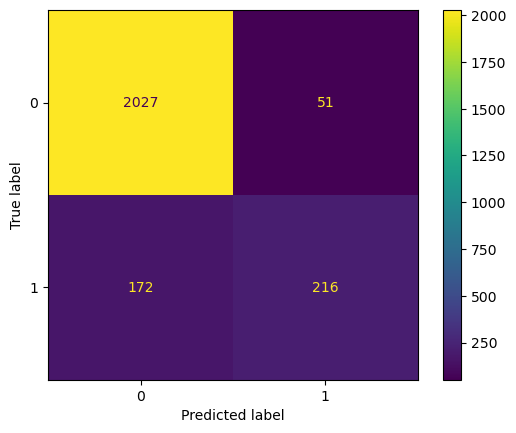

In [72]:

plt.figure(figsize=(5,5))
set_palette("Set2")

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(rf_fit, X_test, y_test)

From the confusion matrix above, we can see that true positive prediction is 2026, which means that 2026 data points are correctly predicted as positive and similarly, 216 labels are correctly predicted as negative. Give the high accuracy score of 0.909, such result makes sense. This disparity is caused by the imbalance of the target variable

### 7.2 BaggingClassifier()

In [73]:
bag_clf = BaggingClassifier(n_estimators=10, random_state=0)

In [74]:
bag_fit = bag_clf.fit(X_train, y_train)

In [75]:
y_pred_bag = bag_fit.predict(X_test)

In [76]:
bag_accu = accuracy_score(y_test, y_pred_bag)

In [77]:
print(bag_accu)

0.8961881589618816


<Figure size 500x500 with 0 Axes>

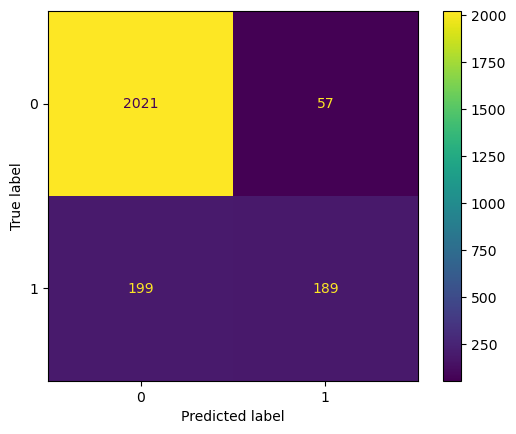

In [78]:
plt.figure(figsize=(5,5))
set_palette("Set2")

conf_matrix = confusion_matrix(y_test, y_pred_bag)
ConfusionMatrixDisplay.from_estimator(bag_fit, X_test, y_test)

We can see that bagging classifier has a similar accuracy score as random forest classifier

### 7.3 XGboostclassifier()

In [91]:
xg_clf = XGBClassifier(tree_method="hist", n_estimators=10)

In [92]:
xg_fit = xg_clf.fit(X_train, y_train)

In [93]:
y_pred_xg = xg_fit.predict(X_test)

In [94]:
xg_accu = accuracy_score(y_test, y_pred_xg)

In [104]:
print(xg_accu)

0.9051094890510949


<Figure size 500x500 with 0 Axes>

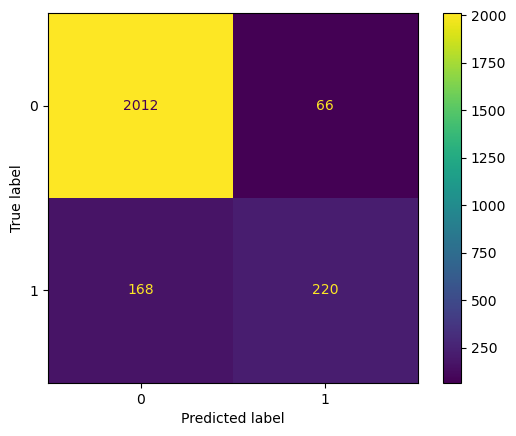

In [95]:
plt.figure(figsize=(5,5))
set_palette("Set2")

conf_matrix = confusion_matrix(y_test, y_pred_xg)
ConfusionMatrixDisplay.from_estimator(xg_fit, X_test, y_test)

We can see that XGBoost classifier has a similar accuracy score as random forest and Bagging classifier

## 8. Classification with GridSearchCV (8 Points):

In [53]:
# Define the classifiers and parameter space
classifiers = [
    ('RandomForest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    }),
    ('Bagging', BaggingClassifier(estimator=RandomForestClassifier()), {
        'n_estimators': [10, 50, 100],
    }),
    ('XGBoost', XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [4, 6, 8],
    }),
]

In [54]:
best_models = {}
best_accuracies = []

In [55]:
# Change the y_train and y_test to 1d array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [58]:
# Perform GridSearchCV for each classifier
for name, clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies.append((name, accuracy))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   1.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   2.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.9s
[CV] END .....................max_depth=10, n_estimators=200; total time=   1.8s
[CV] END .....................max_depth=10, n_estimators=200; total time=   1.8s
[CV] END .....................max_depth=20, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=20, n_estimators=200; total 

[CV] END ....................................n_estimators=50; total time=  38.1s
[CV] END ...................................n_estimators=100; total time= 1.1min
[CV] END ....................................n_estimators=50; total time=  38.3s
[CV] END ...................................n_estimators=100; total time= 1.2min
Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [59]:
for result in best_accuracies:
    print(f"Accuracy of best {result[0]}: {result[1]}")

Accuracy of best RandomForest: 0.9103811841038119
Accuracy of best Bagging: 0.9063260340632603
Accuracy of best XGBoost: 0.9083536090835361


In [61]:
print('-----------------------------------')
for key, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f'Confusion Matrix of {key}:')
    print(confusion_matrix(y_test, y_pred))
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print('-----------------------------------')

-----------------------------------
Confusion Matrix of RandomForest:
[[2025   53]
 [ 168  220]]
Accuracy Score: 0.9103811841038119
-----------------------------------
Confusion Matrix of Bagging:
[[2022   56]
 [ 175  213]]
Accuracy Score: 0.9063260340632603
-----------------------------------
Confusion Matrix of XGBoost:
[[2003   75]
 [ 151  237]]
Accuracy Score: 0.9083536090835361
-----------------------------------


The parameters of best models:

In [105]:
best_models

{'RandomForest': RandomForestClassifier(n_estimators=200),
 'Bagging': BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

According to the results above, we can observe that all the 3 best models chose by gridsearch process have relatively good accuracy that larger than 0.9. Among these 3 models, RandomForest Classifier performs best, with an accuracy of 0.9104

## 9. Classification with RandomSearchCV (8 Points):

In [99]:
# Define the classifiers
classifiers = [
    ('RandomForest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    }),
    ('Bagging', BaggingClassifier(estimator=RandomForestClassifier()), {
        'n_estimators': [10, 50, 100],
    }),
    ('XGBoost', XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [4, 6, 8],
    }),
]

In [100]:
# Store the best models and their accuracy scores
best_models = {}
best_accuracies = []

# Perform RandomizedSearchCV for each classifier
for name, clf, param_dist in classifiers:
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=9, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies.append((name, accuracy))

In [102]:
best_accuracies
for model in best_accuracies:
    print(f"Accuracy of best {model[0]}: {model[1]}")

Accuracy of best RandomForest: 0.9087591240875912
Accuracy of best Bagging: 0.9075425790754258
Accuracy of best XGBoost: 0.9083536090835361


In [103]:
print('-----------------------------------')
for key, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f'Confusion Matrix of {key}:')
    print(confusion_matrix(y_test, y_pred))
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print('-----------------------------------')

-----------------------------------
Confusion Matrix of RandomForest:
[[2019   59]
 [ 166  222]]
Accuracy Score: 0.9087591240875912
-----------------------------------
Confusion Matrix of Bagging:
[[2023   55]
 [ 173  215]]
Accuracy Score: 0.9075425790754258
-----------------------------------
Confusion Matrix of XGBoost:
[[2003   75]
 [ 151  237]]
Accuracy Score: 0.9083536090835361
-----------------------------------


The parameters of best models:

In [105]:
best_models

{'RandomForest': RandomForestClassifier(n_estimators=200),
 'Bagging': BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

According to the results above, we can observe that all the 3 best models chose by random search process have relatively good accuracy that larger than 0.9. Among these 3 models, RandomForest Classifier performs best, with an accuracy of 0.9088

## 10. Comparison and Analysis (5 Points):

| | RandomForest | Bagging | XGBoost |
|----------|----------|----------|----------|
| Routine | 0.9096 | 0.8962 | 0.9051 |
| Grid Search | 0.9104 | 0.9063 | 0.9084 |
| Random Search | 0.9088 | 0.9075 | 0.9084 |



According to the accuracy table above, we can generally conclude that Grid Search performs the best. The accuracy of RandomForest Classifier and XGBoost Classifier trained by Grid Search are highest among all three methods, while the Classification Routine performs the worst on all three different models. Besides, Random Search has highest accuracy of Bagging and Random Search. 

It is known that Grid Search is preferable when we have a small to moderate number of hyperparameters and want to be exhaustive in the search. In comparison, Random Search is more suitable for high-dimensional hyperparameter spaces where it is computationally infeasible to test every possible combination. Therefore, since we don't have so many parameters to tune for these three models, it makes sense that the Grid Search method performs slighly better than Random Search. Also, it is natural that the Classification Routine performs the worst because of the absence of hyperparameter tuning.

As for these three machine learning models, RandomForest performs the best among these models for all three training approaches.

**The final parameters for these models:**

- RandomForest: n_estimators=200, max_depth=None
- Bagging: estimator=RandomForestClassifier(), n_estimators=100
- XGBoost: n_estimators=50, max_depth=4